In [442]:
# dependency list
!pip install tradingview_ta
!pip install stockstats
!pip install yahoofinancials
!pip install yfinance
!pip install pandas_ta
!pip install finta
!pip install plotly
!pip install mplfinance
!pip install scikit-learn
!pip install lightgbm catboost

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In [278]:
# install TA-lib dependencies
"""
!wget http://prdownloads.sourceforge.net/ta-lib/ta-lib-0.4.0-src.tar.gz
!tar -xzvf ta-lib-0.4.0-src.tar.gz
%cd ta-lib
!./configure --prefix=/usr
!make
!sudo make install
"""
!pip install Ta-Lib

Defaulting to user installation because normal site-packages is not writeable


## Data Acquisition and Preprocessing

In [470]:
import pandas as pd
import mplfinance as mpf
import yfinance as yf
import numpy as np
from datetime import date
# fetch and process data
# start = "2023-01-01"
# end = "2023-10-04"

start = '2021-01-01'
end = '2023-12-25'
# end = date.today().strftime('%Y-%m-%d')
tickers_list_symbol = ['AEFES.IS', 'AGHOL.IS', 'AKBNK.IS', 'AKFGY.IS', 'AKSA.IS', 'AKSEN.IS', 'ALARK.IS', 'ALBRK.IS', 'ALGYO.IS', 'ALKIM.IS', 'ARCLK.IS', 'BAGFS.IS', 'BERA.IS', 'BIMAS.IS', 'BRYAT.IS', 'BUCIM.IS', 'CCOLA.IS', 'CEMTS.IS', 'CIMSA.IS', 'DEVA.IS', 'DOAS.IS', 'DOHOL.IS', 'ECILC.IS', 'EGEEN.IS', 'EKGYO.IS', 'ENJSA.IS', 'ENKAI.IS', 'ERBOS.IS', 'EREGL.IS', 'FROTO.IS', 'GARAN.IS', 'GENIL.IS', 'GESAN.IS', 'GLYHO.IS', 'GOZDE.IS', 'GSDHO.IS', 'GUBRF.IS', 'GWIND.IS', 'HALKB.IS', 'ISCTR.IS', 'ISDMR.IS', 'ISFIN.IS', 'ISGYO.IS', 'ISMEN.IS', 'JANTS.IS', 'KARSN.IS', 'KARTN.IS', 'KCHOL.IS', 'KONTR.IS', 'KORDS.IS', 'KOZAA.IS', 'KOZAL.IS', 'KRDMD.IS', 'LOGO.IS', 'MAVI.IS', 'MGROS.IS', 'NTHOL.IS', 'NUGYO.IS', 'ODAS.IS', 'OTKAR.IS', 'OYAKC.IS', 'PETKM.IS', 'PGSUS.IS', 'PRKAB.IS', 'PSGYO.IS', 'QUAGR.IS', 'SAHOL.IS', 'SASA.IS', 'SKBNK.IS', 'SMRTG.IS', 'SNGYO.IS', 'SOKM.IS', 'TAVHL.IS', 'TCELL.IS', 'THYAO.IS', 'TKFEN.IS', 'TMSN.IS', 'TOASO.IS', 'TRGYO.IS', 'TSKB.IS', 'TSPOR.IS', 'TTKOM.IS', 'TTRAK.IS', 'TUKAS.IS', 'TUPRS.IS', 'TURSG.IS', 'ULKER.IS', 'VAKBN.IS', 'VESBE.IS', 'VESTL.IS', 'YATAS.IS', 'YKBNK.IS', 'YYLGD.IS']
df = yf.download(tickers_list_symbol, start, end)
df = df.swaplevel(axis = "columns").sort_index(axis = "columns")  ## swap outer and inner index
# convert column namesto snake_case
new_columns = [(level[0], level[1].lower().replace(' ', '_')) for level in df.columns]
df.columns = pd.MultiIndex.from_tuples(new_columns)

[*********************100%%**********************]  93 of 93 completed


In [471]:
df.columns
df.tail()

AEFES.IS                                                  \
             adj_close       close        high         low        open   
Date                                                                     
2023-12-18  116.300003  116.300003  121.400002  116.099998  118.199997   
2023-12-19  125.900002  125.900002  127.300003  118.300003  118.800003   
2023-12-20  128.800003  128.800003  129.500000  122.900002  125.099998   
2023-12-21  126.800003  126.800003  129.300003  119.300003  129.000000   
2023-12-22  134.500000  134.500000  134.800003  126.800003  126.800003   

                       AGHOL.IS                                      ...  \
             volume   adj_close       close        high         low  ...   
Date                                                                 ...   
2023-12-18  3664534  191.100006  191.100006  199.600006  190.500000  ...   
2023-12-19  6606569  196.500000  196.500000  200.199997  187.199997  ...   
2023-12-20  5675692  197.000000  197.000000  198.000000  191.899994  ...   
2023-12-21  4563640  195.800003  195.800003  197.800003  189.500000  ...   
2023-12-22  4968193  197.699997  197.699997  202.500000  194.000000  ...   

           YKBNK.IS                                   YYLGD.IS                \
               high        low       open     volume adj_close  close   high   
Date                                                                           
2023-12-18    22.02  21.139999  21.400000  183426665     13.68  13.68  14.15   
2023-12-19    21.48  20.100000  21.340000  219991714     13.14  13.14  13.85   
2023-12-20    20.98  20.299999  20.620001  167787821     12.54  12.54  13.20   
2023-12-21    21.60  20.639999  20.980000  213659386     12.85  12.85  12.92   
2023-12-22    20.92  20.219999  20.900000  142199896     12.18  12.18  12.98   

                                      
              low   open      volume  
Date                                  
2023-12-18  13.50  14.13   7083457.0  
2023-12-19  13.07  13.68  11810577.0  
2023-12-20  12.32  13.17  10751623.0  
2023-12-21  12.30  12.66  10877577.0  
2023-12-22  12.04  12.89  11394759.0  

[5 rows x 558 columns]

In [472]:
# handle NaN values
# drop the ticker if NaN exists
for ticker in tickers_list_symbol:
    nan_amount = df[ticker].isna().sum().sum()
    if nan_amount != 0:
        print("NaN containing tickers are deleted: {}, {}" .format(ticker, nan_amount))
        df.drop(ticker, axis=1, level=0, inplace=True)
tickers_list_symbol = df.columns.get_level_values(0).unique() # upate ticker list
df.head()

NaN containing tickers are deleted: GENIL.IS, 3360
NaN containing tickers are deleted: GESAN.IS, 924
NaN containing tickers are deleted: GWIND.IS, 474
NaN containing tickers are deleted: PSGYO.IS, 4086
NaN containing tickers are deleted: QUAGR.IS, 414
NaN containing tickers are deleted: SMRTG.IS, 1842
NaN containing tickers are deleted: YYLGD.IS, 2064


AEFES.IS                                                       \
            adj_close      close       high        low       open   volume   
Date                                                                         
2021-01-04  20.178686  24.000000  24.200001  23.299999  23.420000  4506027   
2021-01-05  20.498182  24.379999  24.660000  23.940001  24.000000  3916294   
2021-01-06  20.817678  24.760000  25.139999  24.559999  24.559999  3310949   
2021-01-07  20.716785  24.639999  25.020000  24.580000  25.000000  2456463   
2021-01-08  22.028402  26.200001  26.500000  24.680000  24.879999  5635764   

             AGHOL.IS                                   ... YATAS.IS         \
            adj_close      close       high        low  ...     high    low   
Date                                                    ...                   
2021-01-04  25.711958  26.420000  26.860001  26.260000  ...    14.50  14.06   
2021-01-05  26.120703  26.840000  27.420000  26.200001  ...    14.62  13.59   
2021-01-06  26.509979  27.240000  27.799999  27.059999  ...    14.62  13.90   
2021-01-07  26.159626  26.879999  27.639999  26.799999  ...    14.25  13.89   
2021-01-08  27.599966  28.360001  28.600000  27.059999  ...    14.46  14.03   

                            YKBNK.IS                                     
             open   volume adj_close close  high   low  open     volume  
Date                                                                     
2021-01-04  14.36  2978255  2.684832  3.08  3.17  3.07  3.09  285252300  
2021-01-05  14.30  4632912  2.658680  3.05  3.12  3.02  3.05  301749025  
2021-01-06  14.22  4229412  2.754568  3.16  3.16  3.07  3.07  313502020  
2021-01-07  14.15  2527536  2.867888  3.29  3.30  3.19  3.20  286782317  
2021-01-08  14.15  2778399  2.894039  3.32  3.36  3.27  3.32  202126741  

[5 rows x 516 columns]

## Plot Candlesticks

/home/arinmis/projects/cse-akdeniz/fall-2023/economics-for-engineering/term-project/env/lib/python3.10/site-packages/mplfinance/_arg_validators.py:84: UserWarning: 


            POSSIBLE TO SEE DETAILS (Candles, Ohlc-Bars, Etc.)
   For more information see:
   - https://github.com/matplotlib/mplfinance/wiki/Plotting-Too-Much-Data
   
   TO SILENCE THIS WARNING, set `type='line'` in `mpf.plot()`
   OR set kwarg `warn_too_much_data=N` where N is an integer 
   LARGER than the number of data points you want to plot.

  warnings.warn('\n\n ================================================================= '+


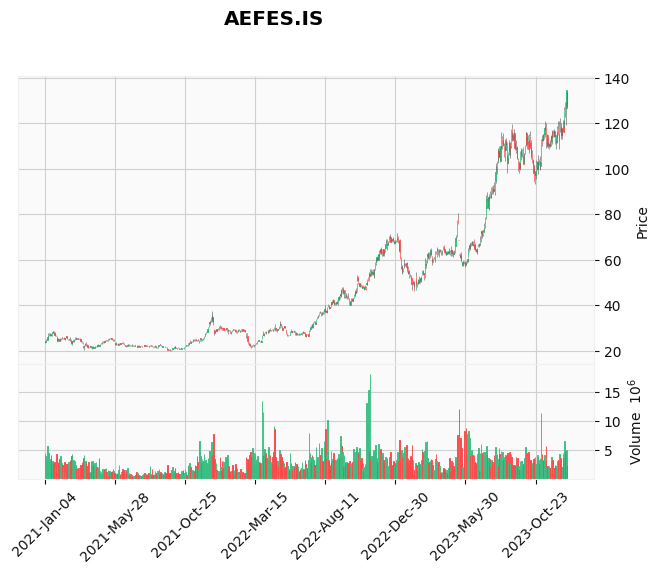

/home/arinmis/projects/cse-akdeniz/fall-2023/economics-for-engineering/term-project/env/lib/python3.10/site-packages/mplfinance/_arg_validators.py:84: UserWarning: 


            POSSIBLE TO SEE DETAILS (Candles, Ohlc-Bars, Etc.)
   For more information see:
   - https://github.com/matplotlib/mplfinance/wiki/Plotting-Too-Much-Data
   
   TO SILENCE THIS WARNING, set `type='line'` in `mpf.plot()`
   OR set kwarg `warn_too_much_data=N` where N is an integer 
   LARGER than the number of data points you want to plot.

  warnings.warn('\n\n ================================================================= '+


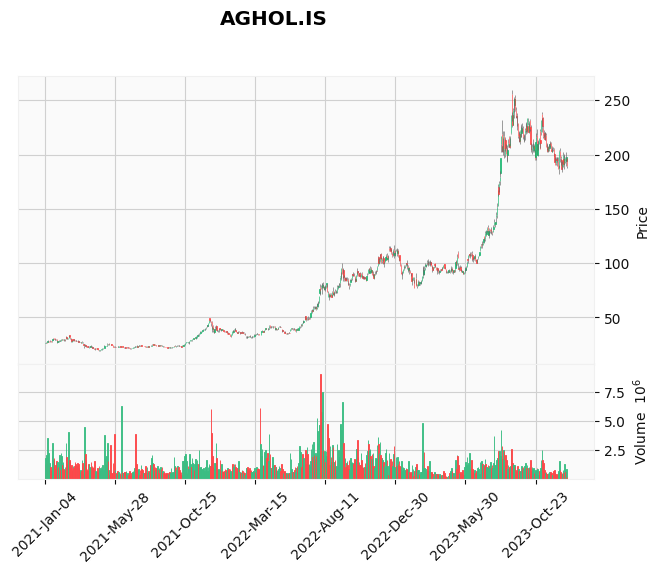

/home/arinmis/projects/cse-akdeniz/fall-2023/economics-for-engineering/term-project/env/lib/python3.10/site-packages/mplfinance/_arg_validators.py:84: UserWarning: 


            POSSIBLE TO SEE DETAILS (Candles, Ohlc-Bars, Etc.)
   For more information see:
   - https://github.com/matplotlib/mplfinance/wiki/Plotting-Too-Much-Data
   
   TO SILENCE THIS WARNING, set `type='line'` in `mpf.plot()`
   OR set kwarg `warn_too_much_data=N` where N is an integer 
   LARGER than the number of data points you want to plot.

  warnings.warn('\n\n ================================================================= '+


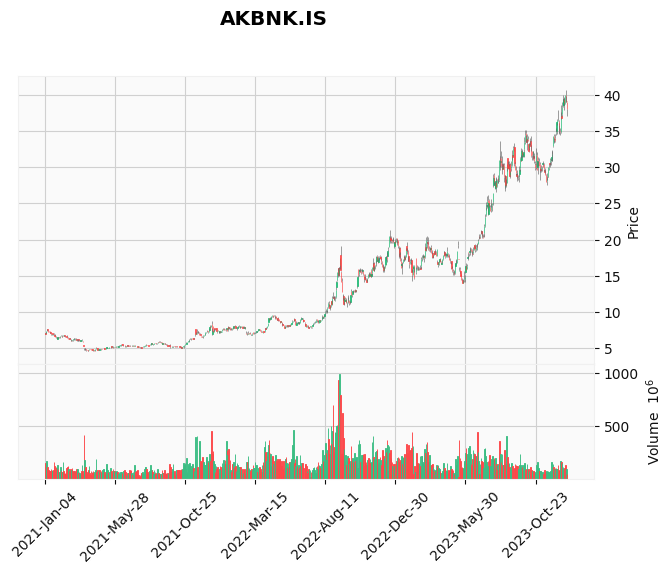

/home/arinmis/projects/cse-akdeniz/fall-2023/economics-for-engineering/term-project/env/lib/python3.10/site-packages/mplfinance/_arg_validators.py:84: UserWarning: 


            POSSIBLE TO SEE DETAILS (Candles, Ohlc-Bars, Etc.)
   For more information see:
   - https://github.com/matplotlib/mplfinance/wiki/Plotting-Too-Much-Data
   
   TO SILENCE THIS WARNING, set `type='line'` in `mpf.plot()`
   OR set kwarg `warn_too_much_data=N` where N is an integer 
   LARGER than the number of data points you want to plot.

  warnings.warn('\n\n ================================================================= '+


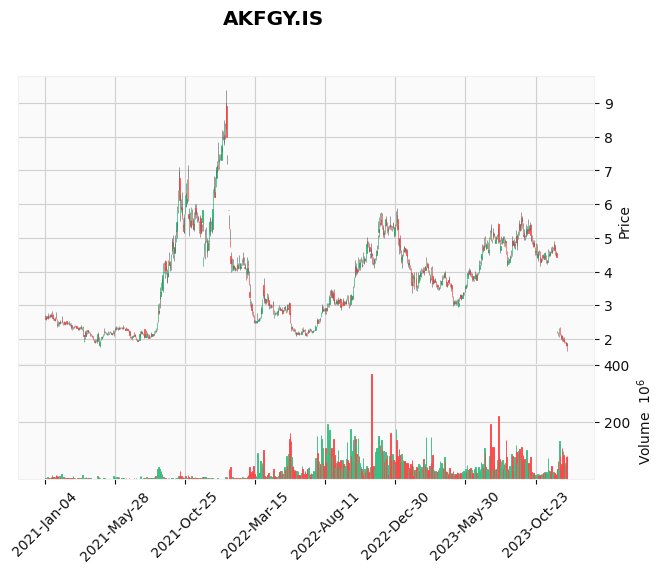

/home/arinmis/projects/cse-akdeniz/fall-2023/economics-for-engineering/term-project/env/lib/python3.10/site-packages/mplfinance/_arg_validators.py:84: UserWarning: 


            POSSIBLE TO SEE DETAILS (Candles, Ohlc-Bars, Etc.)
   For more information see:
   - https://github.com/matplotlib/mplfinance/wiki/Plotting-Too-Much-Data
   
   TO SILENCE THIS WARNING, set `type='line'` in `mpf.plot()`
   OR set kwarg `warn_too_much_data=N` where N is an integer 
   LARGER than the number of data points you want to plot.

  warnings.warn('\n\n ================================================================= '+


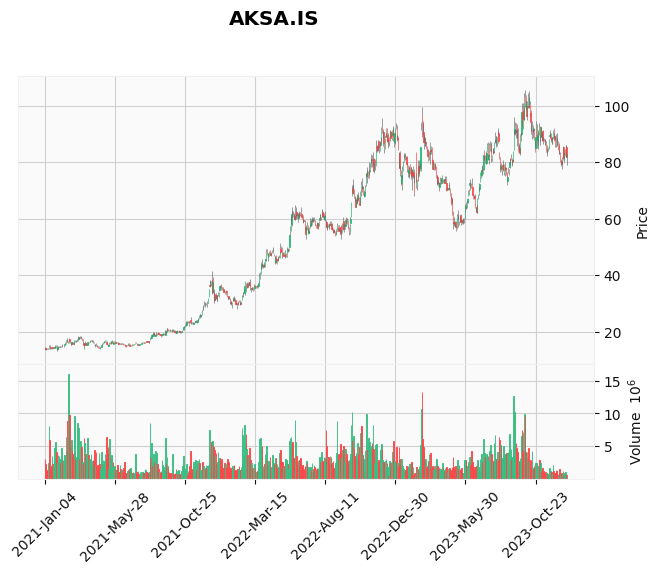

In [282]:
# Plot candlestick chart
import mplfinance as mpf
for ticker in tickers_list_symbol[:5]:
    mpf.plot(df[ticker], 
             type='candle', 
             style='yahoo', 
             volume=True, 
             title= ticker, 
             ylabel='Price')

## Feature Engineering

In [473]:
"""
create new column for candle stick color  
green represented with 1
red represented with -1
"""
for ticker in tickers_list_symbol: 
    df[(ticker, 'candlestick_color')] = df[(ticker, 'close')] - df[(ticker, 'open')]
    df[(ticker, 'candlestick_color')] = df[(ticker, 'candlestick_color')].apply(lambda x: 1 if x > 0 else -1)

## Add Indicators

In [474]:
import talib

for ticker in tickers_list_symbol:
    df[(ticker, 'sma_5')] = talib.SMA(df[(ticker, 'close')], timeperiod=5)
    df[(ticker, 'ema_5')] = talib.EMA(df[(ticker, 'close')], timeperiod=5)
    
    df[(ticker, 'sma_8')] = talib.SMA(df[(ticker, 'close')], timeperiod=8)
    df[(ticker, 'ema_8')] = talib.EMA(df[(ticker, 'close')], timeperiod=8)

    df[(ticker, 'sma_9')] = talib.SMA(df[(ticker, 'close')], timeperiod=9)
    df[(ticker, 'ema_9')] = talib.EMA(df[(ticker, 'close')], timeperiod=9)

    df[(ticker, 'sma_13')] = talib.SMA(df[(ticker, 'close')], timeperiod=13)
    df[(ticker, 'ema_13')] = talib.EMA(df[(ticker, 'close')], timeperiod=13)

    df[(ticker, 'mfi')] = talib.MFI(df[(ticker, 'high')], df[(ticker, 'low')], df[(ticker, 'close')], df[(ticker, 'volume')],
                                    timeperiod=13)
    macd, signal, _ = talib.MACD(df[(ticker, 'close')], fastperiod=12, slowperiod=26, signalperiod=9)
    df[(ticker, 'macd')] = macd - signal

/tmp/ipykernel_7097/2449527257.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[(ticker, 'sma_8')] = talib.SMA(df[(ticker, 'close')], timeperiod=8)
/tmp/ipykernel_7097/2449527257.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[(ticker, 'ema_8')] = talib.EMA(df[(ticker, 'close')], timeperiod=8)
/tmp/ipykernel_7097/2449527257.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once usin

In [476]:
# remove nan values
df.dropna(inplace=True, how="any")

In [477]:
print(df.columns)
df.head()

MultiIndex([('AEFES.IS', 'adj_close'),
            ('AEFES.IS',     'close'),
            ('AEFES.IS',      'high'),
            ('AEFES.IS',       'low'),
            ('AEFES.IS',      'open'),
            ('AEFES.IS',    'volume'),
            ('AGHOL.IS', 'adj_close'),
            ('AGHOL.IS',     'close'),
            ('AGHOL.IS',      'high'),
            ('AGHOL.IS',       'low'),
            ...
            ('YKBNK.IS',     'sma_5'),
            ('YKBNK.IS',     'ema_5'),
            ('YKBNK.IS',     'sma_8'),
            ('YKBNK.IS',     'ema_8'),
            ('YKBNK.IS',     'sma_9'),
            ('YKBNK.IS',     'ema_9'),
            ('YKBNK.IS',    'sma_13'),
            ('YKBNK.IS',    'ema_13'),
            ('YKBNK.IS',       'mfi'),
            ('YKBNK.IS',      'macd')],
           length=1462)


AEFES.IS                                                   \
            adj_close  close       high        low       open   volume   
Date                                                                     
2021-02-18  20.884943  24.84  25.360001  24.799999  25.260000  2068530   
2021-02-19  20.935389  24.90  25.180000  24.559999  24.940001  2936088   
2021-02-22  21.036283  25.02  25.340000  24.820000  25.100000  1969541   
2021-02-23  21.238068  25.26  26.020000  24.280001  25.080000  3317646   
2021-02-24  20.111425  23.92  25.000000  23.860001  24.980000  3062983   

             AGHOL.IS                                   ... YKBNK.IS  \
            adj_close      close       high        low  ...    sma_5   
Date                                                    ...            
2021-02-18  30.254938  30.959999  31.480000  29.920000  ...    2.838   
2021-02-19  33.167072  33.939999  34.020000  30.760000  ...    2.828   
2021-02-22  31.838049  32.580002  34.160000  32.299999  ...    2.796   
2021-02-23  30.235395  30.940001  33.279999  30.600000  ...    2.770   
2021-02-24  28.339573  29.000000  30.900000  28.920000  ...    2.744   

                                                                       \
               ema_5    sma_8     ema_8     sma_9     ema_9    sma_13   
Date                                                                    
2021-02-18  2.821869  2.87250  2.850467  2.877778  2.858169  2.895385   
2021-02-19  2.824579  2.85625  2.845919  2.867778  2.852536  2.891538   
2021-02-22  2.803053  2.83500  2.826826  2.845556  2.834028  2.872308   
2021-02-23  2.775369  2.81250  2.803087  2.822222  2.811223  2.854615   
2021-02-24  2.736912  2.78500  2.771290  2.795556  2.780978  2.836154   

                                           
              ema_13        mfi      macd  
Date                                       
2021-02-18  2.885944  37.138776  0.006051  
2021-02-19  2.877952  37.735174  0.008424  
2021-02-22  2.861102  29.725483  0.006019  
2021-02-23  2.840945  30.307789  0.002647  
2021-02-24  2.815095  30.196985 -0.002437  

[5 rows x 1462 columns]

In [478]:
class PerformanceMetrics:
    def __init__(self, classifier, model, stock, accuracy, precision, recall, f1):
        self.stock = stock
        self.model = model
        self.accuracy = round(accuracy, 3)
        self.precision = round(precision, 3)
        self.recall = round(recall, 3)
        self.f1 = round(f1, 3)
        self.classifer = classifier
    
    def __str__(self):
        return f"{self.stock}, {self.model}, {self.accuracy}, {self.precision}, {self.recall}, {self.f1}"
    
    def __repr__(self):
        return f"{self.stock}, {self.model}, {self.accuracy}, {self.precision}, {self.recall}, {self.f1}"

## Machine Learning Models

In [479]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier

feature_columns = ["sma_5",	"ema_5", "sma_8", "ema_8", "sma_9",	"ema_9", "sma_13", "ema_13", "mfi", "macd"]

# Assuming 'df' is your DataFrame and it's already loaded with the 'candlestick_color' column
def train_random_forest(ticker):
    ticker_df = df[ticker].copy()

    features = ticker_df[feature_columns]
    target = ticker_df['candlestick_color']
    
    # Split the dataset into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

    # Initialize the RandomForestClassifier
    rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
    
    # Fit the model to the training data
    rf_classifier.fit(X_train, y_train)

    # Predict the target on the test set
    y_pred = rf_classifier.predict(X_test)
    
    # Evaluate the model's performance
    report = classification_report(y_test, y_pred, output_dict=True)
    metrics = PerformanceMetrics(
        rf_classifier,
        "random forest",
        ticker,
        accuracy_score(y_test, y_pred),
        report['weighted avg']['precision'],
        report['weighted avg']['recall'],
        report['weighted avg']['f1-score']
    )

    return metrics


def train_lightgbm(ticker):
    ticker_df = df[ticker].copy()
    
    features = ticker_df[feature_columns]
    target = ticker_df['candlestick_color']
    
    X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

    lgbm_classifier = LGBMClassifier(verbose=-1, random_state=42, force_col_wise=True)
    lgbm_classifier.fit(X_train, y_train)

    y_pred = lgbm_classifier.predict(X_test)
    
    # Evaluate the model's performance
    report = classification_report(y_test, y_pred, output_dict=True)
    metrics = PerformanceMetrics(
        lgbm_classifier,
        "lightgbm",
        ticker,
        accuracy_score(y_test, y_pred),
        report['weighted avg']['precision'],
        report['weighted avg']['recall'],
        report['weighted avg']['f1-score']
    )
    return metrics


def train_catboost(ticker):
    ticker_df = df[ticker].copy()

    features = ticker_df[feature_columns]
    target = ticker_df['candlestick_color']
    
    X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

    catboost_classifier = CatBoostClassifier(random_state=42, verbose=0)
    catboost_classifier.fit(X_train, y_train)

    y_pred = catboost_classifier.predict(X_test)
    # Evaluate the model's performance
    report = classification_report(y_test, y_pred, output_dict=True)
    metrics = PerformanceMetrics(
        catboost_classifier,
        "catboost",
        ticker,
        accuracy_score(y_test, y_pred),
        report['weighted avg']['precision'],
        report['weighted avg']['recall'],
        report['weighted avg']['f1-score']
    )
    return metrics

In [480]:
# check accurracies
# Assuming tickers_list_symbol is a list of ticker symbols
metrics = []
for ticker in tickers_list_symbol:
    best_metric = max([train_random_forest(ticker), train_lightgbm(ticker), train_catboost(ticker)], key=lambda x: x.f1)
    print(best_metric)
    metrics.append(best_metric)

AEFES.IS, catboost, 0.503, 0.502, 0.503, 0.502
AGHOL.IS, lightgbm, 0.559, 0.553, 0.559, 0.548
AKBNK.IS, catboost, 0.51, 0.513, 0.51, 0.497
AKFGY.IS, catboost, 0.51, 0.502, 0.51, 0.5
AKSA.IS, lightgbm, 0.497, 0.506, 0.497, 0.501
AKSEN.IS, catboost, 0.538, 0.539, 0.538, 0.534
ALARK.IS, lightgbm, 0.503, 0.504, 0.503, 0.503
ALBRK.IS, lightgbm, 0.469, 0.437, 0.469, 0.441
ALGYO.IS, random forest, 0.462, 0.464, 0.462, 0.454
ALKIM.IS, lightgbm, 0.483, 0.482, 0.483, 0.482
ARCLK.IS, catboost, 0.49, 0.483, 0.49, 0.482
BAGFS.IS, catboost, 0.559, 0.532, 0.559, 0.536
BERA.IS, random forest, 0.476, 0.5, 0.476, 0.484
BIMAS.IS, catboost, 0.615, 0.617, 0.615, 0.616
BRYAT.IS, random forest, 0.517, 0.516, 0.517, 0.5
BUCIM.IS, catboost, 0.552, 0.525, 0.552, 0.514
CCOLA.IS, catboost, 0.503, 0.5, 0.503, 0.499
CEMTS.IS, catboost, 0.497, 0.482, 0.497, 0.487
CIMSA.IS, random forest, 0.49, 0.482, 0.49, 0.479
DEVA.IS, catboost, 0.531, 0.527, 0.531, 0.522
DOAS.IS, lightgbm, 0.552, 0.537, 0.552, 0.538
DOHOL.IS, cat

In [483]:
# write metrics
M_COLUMNS = "stock, model, accuracy, precision, recall, f1"
with open('metrics.csv', 'w') as file:
    file.write(f"{M_COLUMNS}\n")
    for metric in metrics:
        file.write(f"{str(metric)}\n")

## Top 10 model

In [459]:
# top 10 model and stock
top10 = sorted(metrics, key=lambda x: x.f1)[:10]
print(M_COLUMNS)
top10

stock, model, accuracy, precision, recall, f1


[KARTN.IS, catboost, 0.469, 0.433, 0.469, 0.411,
 SAHOL.IS, catboost, 0.427, 0.433, 0.427, 0.429,
 ALBRK.IS, lightgbm, 0.469, 0.437, 0.469, 0.441,
 ALGYO.IS, random forest, 0.462, 0.464, 0.462, 0.454,
 HALKB.IS, lightgbm, 0.469, 0.471, 0.469, 0.456,
 LOGO.IS, lightgbm, 0.462, 0.462, 0.462, 0.46,
 ULKER.IS, catboost, 0.51, 0.513, 0.51, 0.463,
 OYAKC.IS, lightgbm, 0.469, 0.462, 0.469, 0.464,
 TURSG.IS, catboost, 0.476, 0.467, 0.476, 0.469,
 ECILC.IS, catboost, 0.483, 0.473, 0.483, 0.475]

## Next Candlestick 

In [460]:
start = '2021-01-01'
end = date.today().strftime('%Y-%m-%d')
tickers_list_symbol = ['AEFES.IS', 'AGHOL.IS', 'AKBNK.IS', 'AKFGY.IS', 'AKSA.IS', 'AKSEN.IS', 'ALARK.IS', 'ALBRK.IS', 'ALGYO.IS', 'ALKIM.IS', 'ARCLK.IS', 'BAGFS.IS', 'BERA.IS', 'BIMAS.IS', 'BRYAT.IS', 'BUCIM.IS', 'CCOLA.IS', 'CEMTS.IS', 'CIMSA.IS', 'DEVA.IS', 'DOAS.IS', 'DOHOL.IS', 'ECILC.IS', 'EGEEN.IS', 'EKGYO.IS', 'ENJSA.IS', 'ENKAI.IS', 'ERBOS.IS', 'EREGL.IS', 'FROTO.IS', 'GARAN.IS', 'GENIL.IS', 'GESAN.IS', 'GLYHO.IS', 'GOZDE.IS', 'GSDHO.IS', 'GUBRF.IS', 'GWIND.IS', 'HALKB.IS', 'ISCTR.IS', 'ISDMR.IS', 'ISFIN.IS', 'ISGYO.IS', 'ISMEN.IS', 'JANTS.IS', 'KARSN.IS', 'KARTN.IS', 'KCHOL.IS', 'KONTR.IS', 'KORDS.IS', 'KOZAA.IS', 'KOZAL.IS', 'KRDMD.IS', 'LOGO.IS', 'MAVI.IS', 'MGROS.IS', 'NTHOL.IS', 'NUGYO.IS', 'ODAS.IS', 'OTKAR.IS', 'OYAKC.IS', 'PETKM.IS', 'PGSUS.IS', 'PRKAB.IS', 'PSGYO.IS', 'QUAGR.IS', 'SAHOL.IS', 'SASA.IS', 'SKBNK.IS', 'SMRTG.IS', 'SNGYO.IS', 'SOKM.IS', 'TAVHL.IS', 'TCELL.IS', 'THYAO.IS', 'TKFEN.IS', 'TMSN.IS', 'TOASO.IS', 'TRGYO.IS', 'TSKB.IS', 'TSPOR.IS', 'TTKOM.IS', 'TTRAK.IS', 'TUKAS.IS', 'TUPRS.IS', 'TURSG.IS', 'ULKER.IS', 'VAKBN.IS', 'VESBE.IS', 'VESTL.IS', 'YATAS.IS', 'YKBNK.IS', 'YYLGD.IS']
df = yf.download(tickers_list_symbol, start, end)
df = df.swaplevel(axis = "columns").sort_index(axis = "columns")  ## swap outer and inner index
# convert column namesto snake_case
new_columns = [(level[0], level[1].lower().replace(' ', '_')) for level in df.columns]
df.columns = pd.MultiIndex.from_tuples(new_columns)
df.tail()

[*********************100%%**********************]  93 of 93 completed


AEFES.IS                                                  \
             adj_close       close        high         low        open   
Date                                                                     
2023-12-19  125.900002  125.900002  127.300003  118.300003  118.800003   
2023-12-20  128.800003  128.800003  129.500000  122.900002  125.099998   
2023-12-21  126.800003  126.800003  129.300003  119.300003  129.000000   
2023-12-22  134.500000  134.500000  134.800003  126.800003  126.800003   
2023-12-25  129.800003  129.800003  133.899994  127.699997  130.699997   

                       AGHOL.IS                                      ...  \
             volume   adj_close       close        high         low  ...   
Date                                                                 ...   
2023-12-19  6606569  196.500000  196.500000  200.199997  187.199997  ...   
2023-12-20  5675692  197.000000  197.000000  198.000000  191.899994  ...   
2023-12-21  4563640  195.800003  195.800003  197.800003  189.500000  ...   
2023-12-22  4968193  197.699997  197.699997  202.500000  194.000000  ...   
2023-12-25  2358377  189.800003  189.800003  197.100006  187.300003  ...   

             YKBNK.IS                                   YYLGD.IS         \
                 high        low       open     volume adj_close  close   
Date                                                                      
2023-12-19  21.480000  20.100000  21.340000  219991714     13.14  13.14   
2023-12-20  20.980000  20.299999  20.620001  167787821     12.54  12.54   
2023-12-21  21.600000  20.639999  20.980000  213659386     12.85  12.85   
2023-12-22  20.920000  20.219999  20.900000  142199896     12.18  12.18   
2023-12-25  20.360001  19.500000  20.360001   85694274     11.48  11.48   

                                             
             high    low   open      volume  
Date                                         
2023-12-19  13.85  13.07  13.68  11810577.0  
2023-12-20  13.20  12.32  13.17  10751623.0  
2023-12-21  12.92  12.30  12.66  10877577.0  
2023-12-22  12.98  12.04  12.89  11394759.0  
2023-12-25  12.17  11.39  12.17   7986752.0  

[5 rows x 558 columns]

In [461]:
for ticker in [x.stock for x in top10]:
    df[(ticker, 'sma_5')] = talib.SMA(df[(ticker, 'close')], timeperiod=5)
    df[(ticker, 'ema_5')] = talib.EMA(df[(ticker, 'close')], timeperiod=5)
    
    df[(ticker, 'sma_8')] = talib.SMA(df[(ticker, 'close')], timeperiod=8)
    df[(ticker, 'ema_8')] = talib.EMA(df[(ticker, 'close')], timeperiod=8)

    df[(ticker, 'sma_9')] = talib.SMA(df[(ticker, 'close')], timeperiod=9)
    df[(ticker, 'ema_9')] = talib.EMA(df[(ticker, 'close')], timeperiod=9)

    df[(ticker, 'sma_13')] = talib.SMA(df[(ticker, 'close')], timeperiod=13)
    df[(ticker, 'ema_13')] = talib.EMA(df[(ticker, 'close')], timeperiod=13)

    df[(ticker, 'mfi')] = talib.MFI(df[(ticker, 'high')], df[(ticker, 'low')], df[(ticker, 'close')], df[(ticker, 'volume')],
                                    timeperiod=13)
    macd, signal, _ = talib.MACD(df[(ticker, 'close')], fastperiod=12, slowperiod=26, signalperiod=9)
    df[(ticker, 'macd')] = macd - signal

df.tail()

/tmp/ipykernel_7097/3014141059.py:14: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[(ticker, 'mfi')] = talib.MFI(df[(ticker, 'high')], df[(ticker, 'low')], df[(ticker, 'close')], df[(ticker, 'volume')],
/tmp/ipykernel_7097/3014141059.py:17: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[(ticker, 'macd')] = macd - signal


AEFES.IS                                                  \
             adj_close       close        high         low        open   
Date                                                                     
2023-12-19  125.900002  125.900002  127.300003  118.300003  118.800003   
2023-12-20  128.800003  128.800003  129.500000  122.900002  125.099998   
2023-12-21  126.800003  126.800003  129.300003  119.300003  129.000000   
2023-12-22  134.500000  134.500000  134.800003  126.800003  126.800003   
2023-12-25  129.800003  129.800003  133.899994  127.699997  130.699997   

                       AGHOL.IS                                      ...  \
             volume   adj_close       close        high         low  ...   
Date                                                                 ...   
2023-12-19  6606569  196.500000  196.500000  200.199997  187.199997  ...   
2023-12-20  5675692  197.000000  197.000000  198.000000  191.899994  ...   
2023-12-21  4563640  195.800003  195.800003  197.800003  189.500000  ...   
2023-12-22  4968193  197.699997  197.699997  202.500000  194.000000  ...   
2023-12-25  2358377  189.800003  189.800003  197.100006  187.300003  ...   

           ECILC.IS                                                       \
              sma_5      ema_5    sma_8      ema_8      sma_9      ema_9   
Date                                                                       
2023-12-19   42.688  42.726767  42.8275  43.130302  42.953334  43.272717   
2023-12-20   42.696  42.164511  42.4075  42.665791  42.628889  42.826174   
2023-12-21   42.460  42.216341  42.4225  42.588948  42.397778  42.724939   
2023-12-22   41.840  41.977561  42.2875  42.346960  42.320000  42.479951   
2023-12-25   41.504  41.591707  42.2650  42.007635  42.124444  42.147961   

                                                       
               sma_13     ema_13        mfi      macd  
Date                                                   
2023-12-19  43.760000  43.806175  23.626361 -0.239623  
2023-12-20  43.290770  43.411007  23.466187 -0.277568  
2023-12-21  43.015385  43.255149  31.286688 -0.193950  
2023-12-22  42.703077  43.004413  31.428374 -0.172097  
2023-12-25  42.481539  42.692354  31.258003 -0.180775  

[5 rows x 658 columns]

In [464]:
stocks = []
predictions = []

# Iterate through the top10 stocks
for m in top10:
    stock_name = m.stock
    stocks.append(stock_name)

    # Access the data for the specified date
    yesterday_data = df[stock_name].loc["2023-12-25"]

    # Make a prediction using the classifier
    prediction = m.classifer.predict([yesterday_data[feature_columns].values])
    predictions.append(prediction[0])  # Assuming the prediction is a single value

# Create a new DataFrame with the results
prediction_df = pd.DataFrame({
    'Stock': stocks,
    'Prediction': predictions
})


/home/arinmis/projects/cse-akdeniz/fall-2023/economics-for-engineering/term-project/env/lib/python3.10/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [468]:
print(prediction_df)
prediction_df.to_csv('predictions.csv', index=False)

      Stock  Prediction
0  KARTN.IS          -1
1  SAHOL.IS          -1
2  ALBRK.IS          -1
3  ALGYO.IS          -1
4  HALKB.IS           1
5   LOGO.IS          -1
6  ULKER.IS          -1
7  OYAKC.IS          -1
8  TURSG.IS          -1
9  ECILC.IS          -1
